In [2]:
#!pip install scikit-surprise

In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic
from surprise import KNNWithMeans
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [4]:
#plt.style.use('dark_background')

beautyProduct_data = pd.read_csv('recommend_products.csv')

header_list = ['UserId', 'ProductId', 'Rating', 'Timestamp']
electronics_data = pd.read_csv('Electronics.csv')

beautyProduct_data = beautyProduct_data.dropna()
print('\nBeauty products:')
print(beautyProduct_data.head(3))
print(beautyProduct_data.tail(2))

electronics_data = electronics_data.dropna()
print('\nElectronic products:')
print(electronics_data.head(3))
print(electronics_data.tail(2))

print('\nShape of beauty products:', beautyProduct_data.shape, '\nShape of electronic products:', electronics_data.shape)

all_data = [beautyProduct_data, electronics_data]
df = pd.concat(all_data)
print('\nAfter merge two data-set:\n')
print('data-set:\n', df.head(3))
print(df.tail(2))
print('\ndata-set shape:\n', df.shape)


Beauty products:
           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
                 UserId   ProductId  Rating   Timestamp
2023068   AYBIB14QOI9PC  B00LPVG6V0     5.0  1405555200
2023069  A1PB6OT0OOPKNQ  B00LU0LTOU     5.0  1405641600

Electronic products:
           UserId  ProductId  Rating   Timestamp
0  A2CX7LUOHB2NDG  321732944       5  1341100800
1  A2NWSAGRHCP8N5  439886341       1  1367193600
2  A2WNBOD3WNDNKT  439886341       3  1374451200
                 UserId   ProductId  Rating   Timestamp
1048573  A2KIYE5RF0OEMY  B000IF51UQ       4  1391212800
1048574  A1G9Q5UJ5Y7DES  B000IF51UQ       2  1390780800

Shape of beauty products: (2023070, 4) 
Shape of electronic products: (1048575, 4)

After merge two data-set:

data-set:
            UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3


Recommending top 10 products to a new customer:

['B0002L5R78', 'B001MA0QY2', 'B0001FTVEK', 'B000I68BD4', 'B000BQ7GW8', 'B00007E7JU', 'B000BKJZ9Q', 'B000B9RI14', 'B0009V1YR8', 'B000A6PPOK']


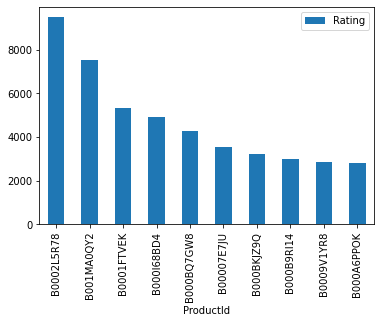

In [5]:
high_rating_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
highest_rating = high_rating_products.sort_values('Rating', ascending=False)
print('\nRecommending top 10 products to a new customer:\n')
print(highest_rating.head(10).index.tolist())
highest_rating.head(10).plot(kind='bar')
plt.show()

In [6]:
df.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071645 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 117.2+ MB


In [8]:
df.describe()

,Rating,Timestamp
count,3.071645e+06,3.071645e+06
mean,4.089071e+00,1.322303e+09
std,1.344714e+00,9.092470e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.288915e+09
50%,5.000000e+00,1.360973e+09
75%,5.000000e+00,1.386547e+09
max,5.000000e+00,1.406074e+09


In [9]:
df.isnull().values.any()

False

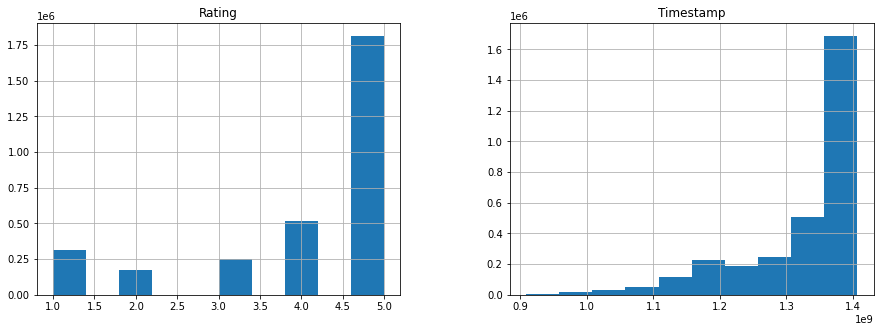

In [10]:
df.hist(figsize=(15, 5))
plt.show()

<AxesSubplot:ylabel='Rating'>

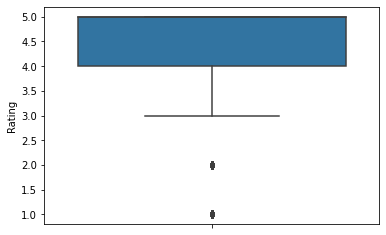

In [11]:
sns.boxplot(y='Rating',data=df)

<AxesSubplot:ylabel='Timestamp'>

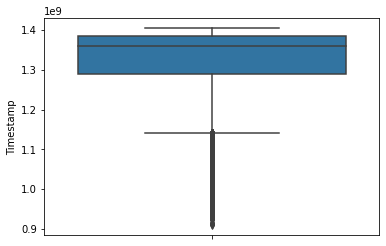

In [12]:
sns.boxplot(y='Timestamp',data=df)

### isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column

In [13]:
counts=df['UserId'].value_counts()
df1=df[df['UserId'].isin(counts[counts>=50].index)]
df1.head(10)

,UserId,ProductId,Rating,Timestamp
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
42,A22ZFXQE8AWPEP,1304482596,1.0,1383177600
47,A22ZFXQE8AWPEP,1304482685,1.0,1383177600
52,A22ZFXQE8AWPEP,1304495396,1.0,1384992000
61,A22ZFXQE8AWPEP,1304511111,1.0,1384992000
66,A22ZFXQE8AWPEP,1304511138,1.0,1384992000
86,A22ZFXQE8AWPEP,1304622665,1.0,1386028800
87,A22ZFXQE8AWPEP,1304624498,1.0,1385683200
92,A22ZFXQE8AWPEP,1304651029,1.0,1386028800
102,A22ZFXQE8AWPEP,130466578X,1.0,1386028800


In [14]:
df1.shape

(36684, 4)

In [15]:
reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df1[['UserId', 'ProductId', 'Rating']], reader)

# SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0389  1.0306  1.0692  1.0173  1.0312  1.0374  0.0173  
MAE (testset)     0.7807  0.7820  0.7965  0.7746  0.7823  0.7832  0.0072  
Fit time          4.03    3.64    3.95    2.46    2.10    3.24    0.80    
Test time         0.08    0.10    0.05    0.05    0.04    0.06    0.02    


{'test_rmse': array([1.03893752, 1.0306327 , 1.06915199, 1.01728592, 1.03121505]),
 'test_mae': array([0.78068287, 0.78202242, 0.79649626, 0.77459871, 0.78230388]),
 'fit_time': (4.027680158615112,
  3.6445417404174805,
  3.950944662094116,
  2.4639971256256104,
  2.097883939743042),
 'test_time': (0.0821685791015625,
  0.10055923461914062,
  0.05012941360473633,
  0.05089426040649414,
  0.03977513313293457)}

### Train and test set

In [16]:
# Split the data into 75% / 25%
trainset, testset = train_test_split(data, test_size=0.25)

### SVD Algorithm

In [125]:
# Run SVD algorithm
algo=SVD()

#Build the model
algo.fit(trainset)
prediction1=algo.test(testset)

# Compute errors
svd_prediction=np.array(prediction1)
y_test=svd_prediction[:,2]
y_pred=svd_prediction[:,3]

accuracy.fcp(prediction1)
print("• RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("• MAE:", mean_absolute_error(y_test, y_pred))
print("• MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("• Adj R2:", r2_score(y_test, y_pred))
print("• MSLE:", mean_squared_log_error(y_test, y_pred))

FCP:  0.3739
• RMSE: 1.0340474791863994
• MAE: 0.7825638050884295
• MAPE: 0.3141485430890373
• Adj R2: 0.1849140598750696
• MSLE: 0.0684645917147121


### Mean squared logarithmic error (MSLE) metric gives the model accuracy for SVD is 93.2%

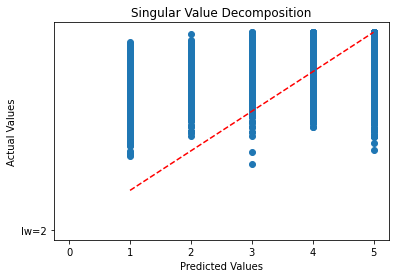

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', 'lw=2',color='red')
plt.title('Singular Value Decomposition')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### KNN Algorithm

In [126]:
# Run KNN algorithm
knn=KNNBasic()

# Build The model
knn.fit(trainset)
prediction2=knn.test(testset)


# Compute errors
knn_prediction=np.array(prediction2)
y_test=knn_prediction[:,2]
y_pred=knn_prediction[:,3]

accuracy.fcp(prediction2)
print("• RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("• MAE:", mean_absolute_error(y_test, y_pred))
print("• Adj R2:", r2_score(y_test, y_pred))
print("• MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("• MSLE:", mean_squared_log_error(y_test, y_pred))

Computing the msd similarity matrix...
Done computing similarity matrix.
FCP:  0.3429
• RMSE: 1.187963113400014
• MAE: 0.8980393758509226
• Adj R2: -0.0757921059135711
• MAPE: 0.36301352584308494
• MSLE: 0.08909535766995158


### Mean squared logarithmic error (MSLE) metric gives the model accuracy for KNN is 91.1%

### KNNWithMeans Algorithm

In [20]:
knnw = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
knnw.fit(trainset)

# Evalute on test set
kwm_pred = knnw.test(testset)
kwm_pred[0]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Prediction(uid='A3BFDEBT5IV4UN', iid='B0030O3VRW', r_ui=5.0, est=3.606837606837607, details={'actual_k': 0, 'was_impossible': False})

In [128]:
# compute error
kwm_prediction=np.array(kwm_pred)
y_test=kwm_prediction[:,2]
y_pred=kwm_prediction[:,3]

accuracy.fcp(kwm_pred)
print("• RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("• MAE:", mean_absolute_error(y_test, y_pred))
print("• Adj R2:", r2_score(y_test, y_pred))
print("• MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("• MSLE:", mean_squared_log_error(y_test, y_pred))

FCP:  0.2818
• RMSE: 1.1067739568823827
• MAE: 0.855272052766878
• Adj R2: 0.06622916749850505
• MAPE: 0.3470148610730839
• MSLE: 0.07769498484673629


### Mean squared logarithmic error (MSLE) metric gives the model accuracy for KNNWithMeans is 92.3%

In [144]:
def top_product(predictions, n=5):
  
    # map the predictions to each user.
    top_p = defaultdict(list)
    for uid, iid,r_ui, est,_ in predictions:
        top_p[uid].append((iid, est))

    # sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_p.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_p[uid] = user_ratings[:n]

    return top_p

top_p = top_product(kwm_pred, n=5)

### Recommend top 5 products for each user

In [145]:
# the recommended items for each user
for uid, user_ratings in top_p.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3BFDEBT5IV4UN ['B005MIFELK', 'B000LLYFUE', 'B005MIFIW0', 'B005FCVY76', 'B005MIFI3E']
A1WX42M589VAMQ ['B002CMLHF6', 'B00127C83M', 'B002N5MKM6', 'B002KDK42O', 'B002BX8QDW']
A2VOGNBUMXSW13 ['B001AZLLG6', 'B0054PCP0O', 'B008D5HAHU', 'B0015XNAS0', 'B000052YM8']
A324GIXX5SIYGA ['B0073B6JN6', 'B007UPKJAO', 'B007P7PQ8W', 'B002N5MKDA', 'B003901L92']
ABDR6IJ93HFIO ['B00BB8ZHJE', 'B00GDLML02', 'B00HSNX1AS', 'B000EEQ83K', 'B003FBRVAS']
A1X1CEGHTHMBL1 ['B0007YFQH6', 'B003VN1ING', 'B000BTL0OA', 'B00064BTEQ', 'B000GHVGSW']
A2ILV6IPPW6W7I ['B0034BUQ42', 'B008EX6PL8', 'B00ADDD5E2', 'B00028PBBI', 'B000146LKS']
A33AQPJYH7UUXR ['B000U26ZZM', 'B000050B6U', 'B000HCGAFK', 'B0009EILKS', 'B003DLPAA8']
A2DPYMNI2HCIOI ['B0009VZHSA', 'B000X9WXSU', 'B00DRLBHYW', 'B003ALF6O6', 'B001RIRIKE']
A2V92F5R7MLCVI ['B00AE07FUE', 'B00G0K6ZQC', 'B006RFZ81S', 'B00A0IWRT4', 'B009FKNGRA']
AANHR0DB9SZ80 ['B00009OL71', 'B003156OF6', 'B003YCAQDC', 'B00B8Z2LRQ', 'B000OFB5QO']
AC1UO4XW14D6W ['B0000YUX4O', 'B007CDSFKU', 'B0018HH444',

### Recommend certain products for a specific user (KNNWithMeans)

In [146]:
pred_kwm = pd.DataFrame(kwm_pred)
pred_kwm[pred_kwm['uid'] == 'A11D1KHM7DVOQK'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
1222,B00000J1G6,1.0,4.187838
4157,B0008GP89E,1.0,4.187838
8542,B000FGJUXC,1.0,4.187838
8032,B00001P3XM,4.0,4.187838
7851,B00004Z0C2,4.0,4.187838
7291,B0002SQ3Z6,3.0,4.187838
7133,B00009EFEK,4.0,4.187838
6790,B0006B486K,5.0,4.187838
6581,B00005B8SF,2.0,4.187838
6394,B000059L44,1.0,4.187838


### Recommend certain products for a specific user (SVD)

In [147]:
pred_svd = pd.DataFrame(prediction1)
pred_svd[pred_svd['uid'] == 'A11D1KHM7DVOQK'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est
3849,B000FONSEQ,3.0,3.541910
4279,B00022TN9A,4.0,3.254148
1289,B0000E1717,5.0,3.239696
1222,B00000J1G6,1.0,3.210862
8542,B000FGJUXC,1.0,3.210862
8032,B00001P3XM,4.0,3.210862
7851,B00004Z0C2,4.0,3.210862
7291,B0002SQ3Z6,3.0,3.210862
7133,B00009EFEK,4.0,3.210862
6790,B0006B486K,5.0,3.210862


### Finally, it shows that SVD gives overall a better accuracy compared to other models